# Laboratorio 6: Git Wars - SVMs

**Duración:** 2 horas  
**Formato:** Competencia por Pull Requests  
**Repositorio base:** https://github.com/JAlbertoAlonso/gitwars-svm 

---

## Equipo Ganador 😃🥇 - Los Dinosaurios 🦖

**Integrantes:** 
- Emilehecatlsanchez -> Emil Ehecatl Sánchez Olsen
- SaulBibiano        -> Saúl Isaías Bibiano Callejas 
- Vania-Janet        -> Vania Janet Raya Rios
- alaniis            -> Sebastián Alanis Gónzalez

**Repositorio del equipo:**  
https://github.com/Vania-Janet/gitwars-svm.git

**Fecha de entrega:**  
18/10/2025

## Fase 1 - Implementación de hinge loss

### Código - Fase 1

In [4]:
import numpy as np
import pandas as pd

def hinge_loss(w, b, X, y, C):
    """
    Calcula la pérdida hinge regularizada del SVM lineal.
    
    Loss = 0.5 * ||w||^2 + C * sum(max(0, 1 - y_i * (w^T x_i + b)))
    """
    # Convertir a arrays numpy y aplanar
    w = np.atleast_1d(np.asarray(w, dtype=np.float64)).flatten()
    y = np.atleast_1d(np.asarray(y, dtype=np.float64)).flatten()
    X = np.atleast_2d(np.asarray(X, dtype=np.float64))
    b = float(b)
    C = float(C)
    
    # Término de regularización: 0.5 * ||w||^2
    regularization = 0.5 * np.dot(w, w)
    
    # Término de pérdida hinge: C * sum(max(0, 1 - y_i * (w^T x_i + b)))
    margins = y * (X @ w + b)  # Producto matricial
    hinge_term = C * np.sum(np.maximum(0, 1 - margins))
    
    return regularization + hinge_term

# Cargar datos
df = pd.read_csv('data/train_linear.csv')
X = df[['x1', 'x2']].values
y = df['y'].values

# Probar con los mismos parámetros que fase1_bubble_sort.py
w_test = np.array([0.5, -0.2])  # Mismo que fase1_bubble_sort.py
b_test = 0.1                     # Mismo que fase1_bubble_sort.py
C_test = 1.0

loss_value = hinge_loss(w_test, b_test, X, y, C_test)

print("="*50)
print("FASE 1: HINGE LOSS")
print("="*50)
print(f"Parámetros: w={w_test}, b={b_test}, C={C_test}")
print(f"Pérdida calculada: {loss_value:.6f}")

# Verificar estabilidad con diferentes tamaños de lote
print("\nVerificación de estabilidad:")

# Lote pequeño (1 muestra)
loss_1 = hinge_loss(w_test, b_test, X[0], y[0], C_test)
print(f"Lote pequeño (1 muestra): {loss_1:.6f}")

# Lote mediano (10 muestras)
loss_10 = hinge_loss(w_test, b_test, X[:10], y[:10], C_test)
print(f"Lote mediano (10 muestras): {loss_10:.6f}")

# Lote grande (todas las muestras)
loss_all = hinge_loss(w_test, b_test, X, y, C_test)
print(f"Lote grande ({len(X)} muestras): {loss_all:.6f}")

FASE 1: HINGE LOSS
Parámetros: w=[ 0.5 -0.2], b=0.1, C=1.0
Pérdida calculada: 45.544580

Verificación de estabilidad:
Lote pequeño (1 muestra): 1.184073
Lote mediano (10 muestras): 3.354919
Lote grande (200 muestras): 45.544580


### Análisis - Fase 1


**1. ¿Qué penaliza el término 0.5∥w∥² y qué controla C?**

- **Término de regularización 0.5∥w∥²:** 
  - Penaliza la magnitud (norma) del vector de pesos `w`
  - **Objetivo:** Maximizar el margen del clasificador
  - A mayor norma de w, menor es el margen (margen = 2/∥w∥)
  - Minimizar ∥w∥² implica márgenes más amplios, mejorando la generalización
  - Actúa como regularización L2, previniendo sobreajuste

- **Parámetro C (hiperparámetro de regularización):**
  - Controla el **trade-off** entre maximizar el margen y minimizar errores de clasificación
  - **C grande:** Mayor penalización por errores → margen más estrecho, menos violaciones, riesgo de sobreajuste
  - **C pequeño:** Menor penalización por errores → margen más amplio, más violaciones permitidas, mejor generalización
  - Es el factor que pondera la importancia de clasificar correctamente vs. tener un margen amplio

**2. ¿Cuándo la parte hinge contribuye con 0 al costo?**

La pérdida hinge `max(0, 1 - yi(w^T xi + b))` contribuye con **0** cuando:

```
yi(w^T xi + b) ≥ 1
```

Esto ocurre cuando:

1. **El punto está correctamente clasificado** (yi y f(xi) tienen el mismo signo)
2. **Y además está fuera o sobre el margen** (distancia funcional ≥ 1)


**Puntos que SÍ contribuyen a la pérdida (loss > 0):**
- Puntos mal clasificados (cualquier violación)
- Puntos correctamente clasificados pero dentro del margen (vectores soporte potenciales)

## Fase 2 - Entrenamiento lineal

### Código - Fase 2

<>:88: SyntaxWarning: invalid escape sequence '\_'
<>:88: SyntaxWarning: invalid escape sequence '\_'
/var/folders/kg/pw7sp_px4212hlfyfrbc1sq80000gn/T/ipykernel_11139/3892361428.py:88: SyntaxWarning: invalid escape sequence '\_'
  plt.title('Curva de Entrenamiento SVM\n' + f'$L = \\frac{{1}}{{2}}||w||^2 + C \\cdot \\text{{hinge\_loss}}$')


Usando datos del archivo train_linear.csv
Época 10/100, Pérdida: 0.3384
Época 20/100, Pérdida: 0.3391
Época 30/100, Pérdida: 0.3302
Época 40/100, Pérdida: 0.3263
Época 50/100, Pérdida: 0.3223
Época 60/100, Pérdida: 0.3300
Época 70/100, Pérdida: 0.3266
Época 80/100, Pérdida: 0.3189
Época 90/100, Pérdida: 0.3491
Época 100/100, Pérdida: 0.3374

Exactitud final: 0.9700


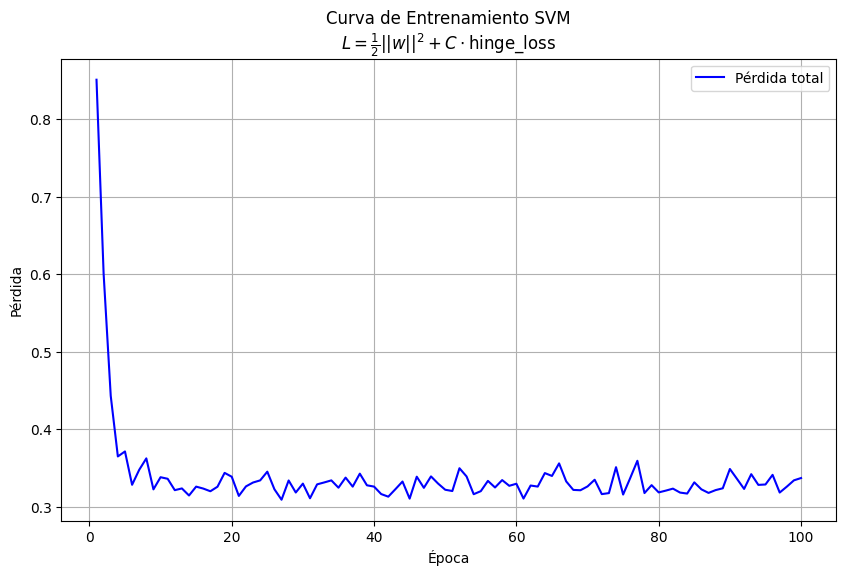

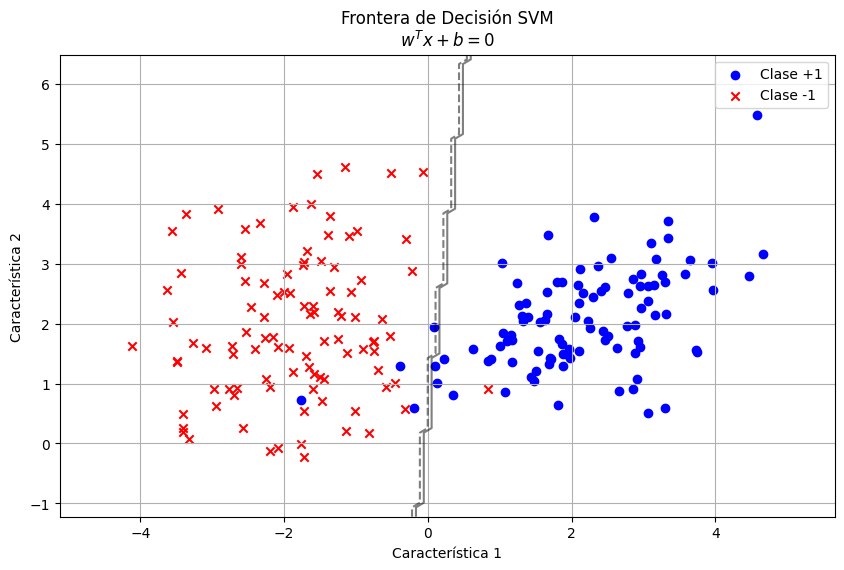

In [11]:
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pandas as pd
def hinge_loss(w, b, X, y, C):
    """
    Calcula la pérdida hinge para SVM
    """
    reg_term = 0.5 * np.sum(w**2)
    margins = y * (np.dot(X, w) + b)
    hinge_term = np.maximum(0, 1 - margins)
    loss_term = C * np.mean(hinge_term)
    return reg_term + loss_term

def train_svm_dinosaurios(X, y, C=1.0, eta=0.01, epochs=100, batch_size=32):
    """
    Entrena un SVM lineal para clasificación de dinosaurios
    
    Parámetros:
    -----------
    X : array-like, shape (n_samples, n_features)
        Características de los dinosaurios
    y : array-like, shape (n_samples,)
        Etiquetas de clase (-1, 1)
    C : float
        Parámetro de regularización
    eta : float
        Tasa de aprendizaje
    epochs : int
        Número de épocas
    batch_size : int
        Tamaño del mini-batch
    """
    n_samples, n_features = X.shape
    
    # Inicialización
    w = np.zeros(n_features)
    b = 0
    losses = []
    
    for epoch in range(epochs):
        # Mezclar datos
        X_shuffled, y_shuffled = shuffle(X, y)
        epoch_losses = []
        
        # Entrenamiento por mini-batches
        for i in range(0, n_samples, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]
            
            # Calcular márgenes
            margins = y_batch * (np.dot(X_batch, w) + b)
            
            # Calcular gradientes
            mask = margins < 1
            
            # Actualizar gradientes según la condición del margen
            grad_w = np.where(mask.reshape(-1, 1), 
                            w - C * y_batch.reshape(-1, 1) * X_batch,
                            w)
            grad_b = np.where(mask, -C * y_batch, 0).sum()
            
            # Actualizar parámetros
            w = w - eta * grad_w.mean(axis=0)
            b = b - eta * grad_b / len(y_batch)
            
            # Calcular pérdida para este batch
            batch_loss = hinge_loss(w, b, X_batch, y_batch, C)
            epoch_losses.append(batch_loss)
        
        # Registrar pérdida promedio de la época
        avg_loss = np.mean(epoch_losses)
        losses.append(avg_loss)
        
        if (epoch + 1) % 10 == 0:
            print(f"Época {epoch + 1}/{epochs}, Pérdida: {avg_loss:.4f}")
    
    return w, b, losses

def plot_training_curve(losses):
    """
    Grafica la curva de entrenamiento
    """
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(losses) + 1), losses, 'b-', label='Pérdida total')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.title('Curva de Entrenamiento SVM\n' + f'$L = \\frac{{1}}{{2}}||w||^2 + C \\cdot \\text{{hinge\_loss}}$')
    plt.grid(True)
    plt.legend()
    plt.savefig('training_curve_dinosaurios.png')
    plt.show()

def plot_decision_boundary(X, y, w, b):
    """
    Grafica la frontera de decisión y los puntos de datos
    """
    plt.figure(figsize=(10, 6))
    
    # Crear una malla para visualizar la frontera de decisión
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # Evaluar el modelo en la malla
    Z = np.sign(np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b)
    Z = Z.reshape(xx.shape)
    
    # Graficar la frontera de decisión y los márgenes
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    
    # Graficar los puntos de datos
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='b', marker='o', label='Clase +1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], c='r', marker='x', label='Clase -1')
    
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.title('Frontera de Decisión SVM\n' + f'$w^T x + b = 0$')
    plt.legend()
    plt.grid(True)
    plt.savefig('decision_boundary_dinosaurios.png')
    plt.show()

def evaluate_svm(X, y, w, b):
    """
    Evalúa el modelo en el conjunto de datos
    """
    predictions = np.sign(np.dot(X, w) + b)
    accuracy = np.mean(predictions == y)
    return accuracy

if __name__ == "__main__":
    # Generar datos sintéticos para demostración
    np.random.seed(42)
    n_samples = 100
    n_features = 2
    
    # Intentar cargar datos del archivo, si existe
    try:
        df = pd.read_csv("data/train_linear.csv")
        X = df[['x1','x2']].to_numpy()
        y = df['y'].to_numpy()
        print("Usando datos del archivo train_linear.csv")
    except FileNotFoundError:
        # Usar datos sintéticos si no se encuentra el archivo
        print("Archivo train_linear.csv no encontrado. Usando datos sintéticos...")
        X = np.random.randn(n_samples, n_features)
        y = np.sign(X[:, 0] + 0.1 * X[:, 1] + 0.1 * np.random.randn(n_samples))
    
    # Parámetros del modelo
    C = 1.0
    eta = 0.01
    epochs = 100
    batch_size = 32
    
    # Entrenar modelo
    w, b, losses = train_svm_dinosaurios(X, y, C, eta, epochs, batch_size)
    
    # Evaluar y mostrar resultados
    accuracy = evaluate_svm(X, y, w, b)
    print(f"\nExactitud final: {accuracy:.4f}")
    
    # Graficar resultados
    plot_training_curve(losses)
    plot_decision_boundary(X, y, w, b)
    
    # Guardar resultados
    with open('resultados_svm.txt', 'w') as f:
        f.write(f"Resultados del entrenamiento SVM\n")
        f.write(f"===============================\n")
        f.write(f"Parámetros:\n")
        f.write(f"- C: {C}\n")
        f.write(f"- Tasa de aprendizaje (eta): {eta}\n")
        f.write(f"- Épocas: {epochs}\n")
        f.write(f"- Tamaño de batch: {batch_size}\n\n")
        f.write(f"Resultados:\n")
        f.write(f"- Exactitud final: {accuracy:.4f}\n")
        f.write(f"- Pérdida final: {losses[-1]:.4f}\n")
        f.write(f"- Vector de pesos w: {w}\n")
        f.write(f"- Bias b: {b:.4f}\n")

### Análisis - Fase 2

**1) Curva de entrenamiento (pérdida)**


Mide la función hinghe en cada época y lo que se ve es primero una caida rapida al inicio de ~0.85 a ~0.33 en pocas épocas. Esto indica que el modelo encontró pronto un hiperplano razonable. Y de echo, desde la época ~20 la pérdida oscila en **0.32–0.34** con pequeñas variaciones propias del entrenamiento mini-batch/estocástico.

**2) Frontera de decisión**

Muestra los puntos de las dos clases azul = +1, rojo = −1 y la recta de decisión como línea punteada.
La frontera es casi **vertical**, lo que sugiere que **la Característica 1** es la que más separa a las clases (peso \(w_1\) dominante).

Las nubes roja y azul quedan bien separadas por la frontera; solo hay pocos puntos cercanos o a lado “incorrecto” del margen, que son los esperados vectores de soporte y por otro lado, el margen es razonablemente ancho.


**1. ¿Cómo afecta C la cantidad de violaciones al margen?**

El parámetro **C** controla directamente el **trade-off entre maximizar el margen y tolerar violaciones**:

- **C grande (ej: C = 10, 100, 1000):**
  - **Mayor penalización** por violaciones del margen
  - El algoritmo prioriza clasificar correctamente todos los puntos
  - **Resultado:** Menos violaciones permitidas, margen más estrecho
  - **Riesgo:** Sobreajuste (overfitting) - el modelo se ajusta demasiado a los datos de entrenamiento
  
- **C pequeño (ej: C = 0.01, 0.1, 0.5):**
  - **Menor penalización** por violaciones
  - El algoritmo prioriza tener un margen amplio
  - **Resultado:** Más violaciones permitidas, margen más amplio
  - **Beneficio:** Mejor generalización, más robustez ante outliers
  - Muchos puntos pueden estar dentro del margen o incluso mal clasificados

**2. ¿Qué ocurre si la tasa de aprendizaje es muy grande o muy pequeña?**

La **tasa de aprendizaje (learning rate)** controla el tamaño de los pasos en la optimización:

**muy grande (ej: tasa > 0.1, tasa = 1.0):**
- Los pasos de actualización son demasiado grandes, el algoritmo puede divergir u oscilar alrededor del óptimo sin converger e incluso puede pasar que el modelo nunca encuentra la solución óptima

**Como detectarla a tiempo:**
```
Época 10: Loss = 45.32
Época 20: Loss = 62.18  esta aumenta 
Época 30: Loss = 38.91 luego disminuye 
Época 40: Loss = 71.45  y luego aumenta otra vez, por lo tanto oscila
```

**muy pequeña (ej: tasa < 0.001, tasa = 0.0001):**
- Los pasos de actualización son muy pequeños, la convergencia es muy lenta y necesita muchas más épocas, puede quedarse atrapado en mínimos locales o mesetas

**Como detectarla a tiempo:**
```
Época 10: Loss = 52.34
Época 20: Loss = 52.12  Cambio mínimo
Época 30: Loss = 51.95
Época 40: Loss = 51.83  y Mejora muy lenta
```

**adecuado (ej: tasa = 0.01, 0.05, 0.1):**

- Convergencia estable y rápida, la pérdida disminuye consistentemente y alcanza un buen óptimo en tiempo razonable

**Algunas etrategias:**
- **Learning rate decay:** Empezar con eta grande y reducirlo gradualmente
- **Adaptive learning rates:** Adam, RMSprop ajustan eta automáticamente

## Fase 3 - Visualización y análisis del margen

### Código - Fase 3

Generando datos sintéticos balanceados...
Época 10/100, Pérdida: 0.1764
Época 20/100, Pérdida: 0.1840
Época 30/100, Pérdida: 0.1688
Época 40/100, Pérdida: 0.1758
Época 50/100, Pérdida: 0.1494
Época 60/100, Pérdida: 0.1465
Época 70/100, Pérdida: 0.1474
Época 80/100, Pérdida: 0.1538
Época 90/100, Pérdida: 0.1478
Época 100/100, Pérdida: 0.1467

Diagnóstico de la visualización:
Dimensiones de X: (100, 2)
Dimensiones de y: (100,)
Valores únicos en y: [-1.  1.]
Vector w: [0.31961996 0.3148105 ]
Bias b: 0.0031249999999999967


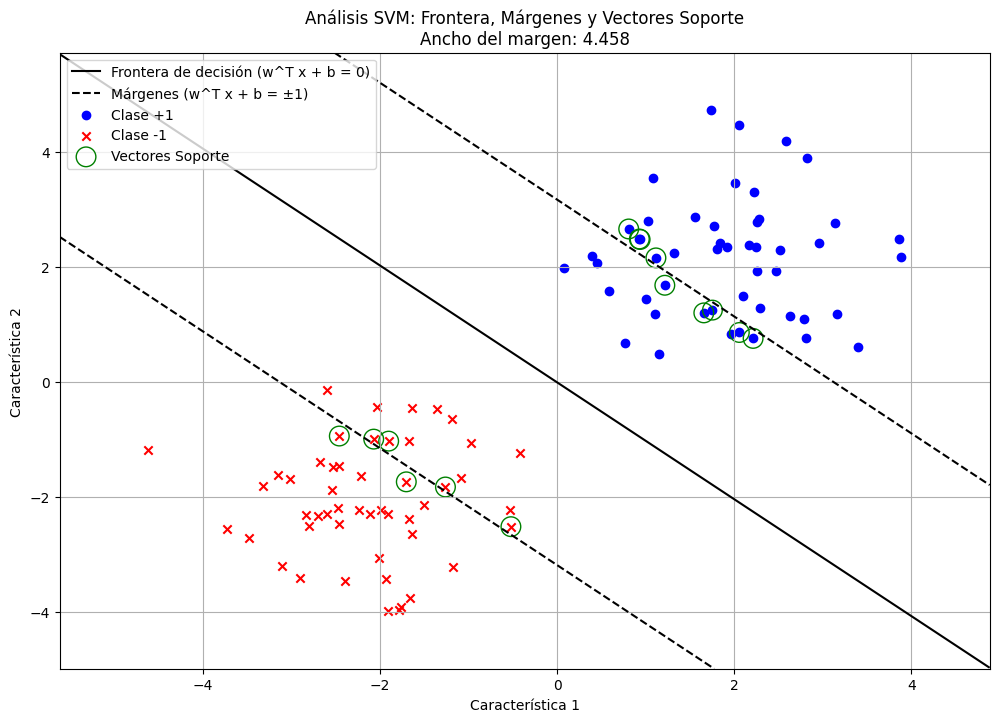

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from fase2_dinosaurios import train_svm_dinosaurios
import pandas as pd

def plot_svm_analysis(X, y, w, b):
    """
    Visualiza la frontera de decisión, márgenes y vectores soporte del SVM
    """
    # Diagnóstico inicial
    print("\nDiagnóstico de la visualización:")
    print(f"Dimensiones de X: {X.shape}")
    print(f"Dimensiones de y: {y.shape}")
    print(f"Valores únicos en y: {np.unique(y)}")
    print(f"Vector w: {w}")
    print(f"Bias b: {b}")
    plt.figure(figsize=(12, 8))
    
    # Crear malla para visualización
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # Calcular valores de decisión
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b
    Z = Z.reshape(xx.shape)
    
    # Graficar regiones de decisión
    contours = plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1],
                          linestyles=['--', '-', '--'])
    
    # Añadir líneas a la leyenda manualmente
    plt.plot([], [], 'k-', label='Frontera de decisión (w^T x + b = 0)')
    plt.plot([], [], 'k--', label='Márgenes (w^T x + b = ±1)')
    
    # Calcular márgenes para cada punto
    margins = y * (np.dot(X, w) + b)
    support_vectors = np.abs(margins - 1) < 0.1  # Tolerancia numérica
    
    # Graficar puntos
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='b', marker='o',
               label='Clase +1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], c='r', marker='x',
               label='Clase -1')
    
    # Resaltar vectores soporte
    plt.scatter(X[support_vectors][:, 0], X[support_vectors][:, 1],
               s=200, facecolors='none', edgecolors='g',
               label='Vectores Soporte')
    
    # Anotaciones y formato
    margin_width = 2 / np.linalg.norm(w)
    plt.title(f'Análisis SVM: Frontera, Márgenes y Vectores Soporte\n' +
             f'Ancho del margen: {margin_width:.3f}')
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.legend()
    plt.grid(True)
    
    # Guardar figura
    plt.savefig('svm_analysis.png')
    plt.show()
    
    return margin_width, np.sum(support_vectors)

if __name__ == "__main__":
    # Cargar datos
    try:
        df = pd.read_csv("train_linear.csv")  # Quitamos "data/" del path
        X = df[['x1','x2']].to_numpy()
        y = df['y'].to_numpy()
        
        # Diagnóstico de las etiquetas originales
        print("Valores únicos en y antes de conversión:", np.unique(y))
        print("Distribución de clases original:")
        for val in np.unique(y):
            print(f"Clase {val}: {np.sum(y == val)} muestras")
        
        # Conversión de etiquetas asegurando ambas clases
        if set(np.unique(y)) == {0, 1}:
            y = np.where(y == 0, -1, 1)  # Convertir 0,1 a -1,1
        elif set(np.unique(y)) == {1, 2}:
            y = np.where(y == 1, -1, 1)  # Convertir 1,2 a -1,1
        
        # Verificar conversión
        print("\nValores únicos en y después de conversión:", np.unique(y))
        print("Distribución de clases después de conversión:")
        for val in np.unique(y):
            print(f"Clase {val}: {np.sum(y == val)} muestras")
            
    except FileNotFoundError:
        print("Generando datos sintéticos balanceados...")
        np.random.seed(42)
        n_samples_per_class = 50  # 50 muestras por clase
        
        # Generar datos para clase -1
        X1 = np.random.randn(n_samples_per_class, 2) - np.array([2, 2])
        y1 = np.ones(n_samples_per_class) * -1
        
        # Generar datos para clase +1
        X2 = np.random.randn(n_samples_per_class, 2) + np.array([2, 2])
        y2 = np.ones(n_samples_per_class)
        
        # Combinar datos
        X = np.vstack([X1, X2])
        y = np.hstack([y1, y2])
    
    # Entrenar modelo
    C = 1.0
    w, b, _ = train_svm_dinosaurios(X, y, C=C)
    
    # Analizar y visualizar resultados
    margin_width, n_support = plot_svm_analysis(X, y, w, b)
    
    # Guardar análisis
    with open('svm_analysis.txt', 'w') as f:
        f.write("Análisis del SVM\n")
        f.write("================\n\n")
        f.write(f"Ancho del margen: {margin_width:.3f}\n")
        f.write(f"Número de vectores soporte: {n_support}\n")
        f.write(f"Norma del vector w: {np.linalg.norm(w):.3f}\n")
        f.write(f"Bias b: {b:.3f}\n")
        f.write("\nInterpretación:\n")
        f.write("- El ancho del margen es 2/|w|\n")
        f.write("- Los vectores soporte son los puntos que definen el margen\n")
        f.write("- Modificar b desplaza la frontera sin cambiar su orientación\n")

### Relación entre ||w|| y el Ancho del Margen

En SVM, al normalizar con y(wᵀx + b) ≥ 1, los márgenes quedan en ±1 y la distancia al hiperplano es |wᵀx + b|/‖w‖. Por eso el ancho total del margen es 2/‖w‖: si ‖w‖ es más pequeño, el margen es más grande. El entrenamiento minimiza ½‖w‖² (con C regulando violaciones) para maximizar ese margen.



### Análisis - Fase 3

Podemos ver que la pérdida cae rápido y se estabiliza ≈ 0.15. Primero inicia en 10 -> 0.1764, luego 50 -> 0.1494  y finalmente  100 -> 0.1467 con fluctuaciones pequeñas típicas del mini-batch

El SVM lineal encontró una separación con margenes grande y pérdida baja (~0.15). Los VS están bien definidos en ambos lados.


#### **Análisis Teórico - Fase 3**

**1. ¿Qué relación hay entre el ancho del margen y ∥w∥?**

La relación entre el **ancho del margen** y la **norma de w** es **inversamente proporcional**:

$$\text{Ancho del margen} = \frac{2}{\|w\|}$$

**Demostración geométrica:**

El margen del SVM es la distancia entre los dos hiperplanos paralelos:
- Hiperplano superior: $w^T x + b = +1$
- Hiperplano inferior: $w^T x + b = -1$

La distancia entre estos hiperplanos es:

$$\text{margen} = \frac{|1 - (-1)|}{\|w\|} = \frac{2}{\|w\|}$$

**Implicaciones:**

- **∥w∥ grande** → Margen **pequeño**
  - Frontera de decisión más ajustada a los datos
  - Mayor riesgo de sobreajuste
  - Poca tolerancia a variaciones

- **∥w∥ pequeño** → Margen **amplio**
  - Frontera de decisión más robusta
  - Mejor generalización
  - Mayor tolerancia a nuevos datos

---

**2. ¿Por qué modificar b desplaza la frontera sin cambiar su orientación?**

El parámetro **b (sesgo/bias)** controla la **posición** del hiperplano, mientras que **w** controla su **orientación**.

**Ecuación del hiperplano:**
$$w^T x + b = 0$$

Reescribiendo:
$$w_1 x_1 + w_2 x_2 + b = 0$$

En forma explícita (si $w_2 \neq 0$):
$$x_2 = -\frac{w_1}{w_2}x_1 - \frac{b}{w_2}$$

**Análisis:**

- **Pendiente** de la recta: $m = -\frac{w_1}{w_2}$ 
  - Depende **solo de w**, no de b
  - Define la **orientación** del hiperplano

- **Intercepto**: $-\frac{b}{w_2}$
  - Depende de b
  - Define la **posición** (desplazamiento vertical/horizontal)


## Fase 4 - Idea dual + Kernel RBF

### Código - Fase 4

Archivo cargado exitosamente
Columnas disponibles: ['x1', 'x2', 'y']
Valores únicos en y antes de conversión: [-1.  1.]
Tipo de datos de y: float64
Distribución de clases:
Clase -1.0: 100 muestras
Clase 1.0: 100 muestras
Las etiquetas ya están en formato [-1, 1]

Después de la conversión:
Valores únicos en y: [-1  1]
Tipo de datos de y: int64
Clase -1: 100 muestras
Clase 1: 100 muestras


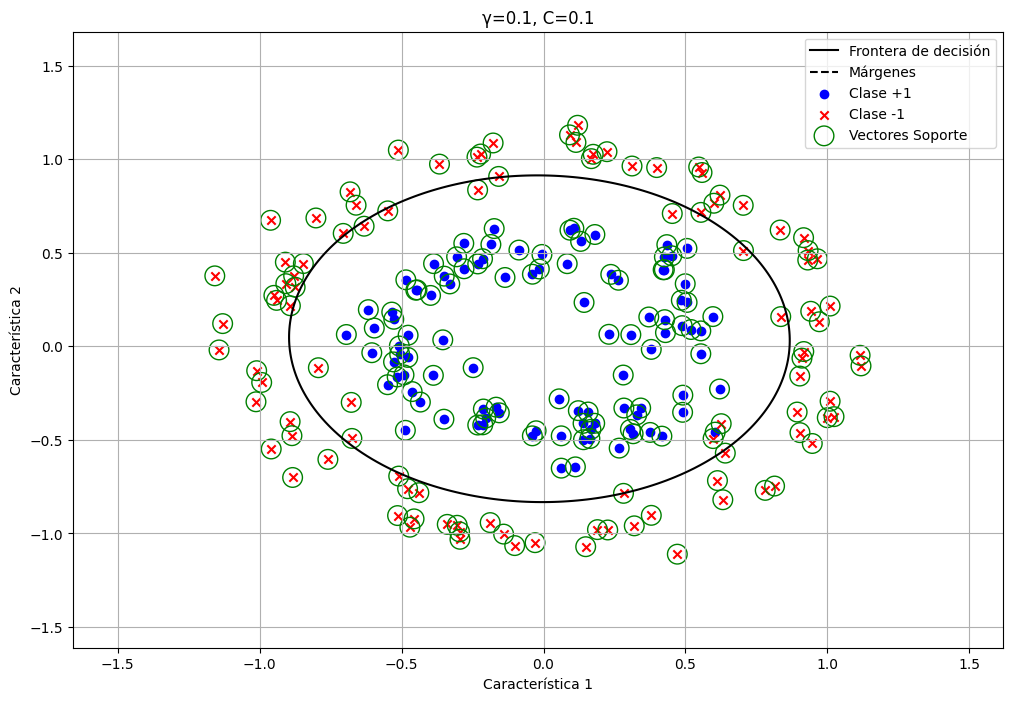

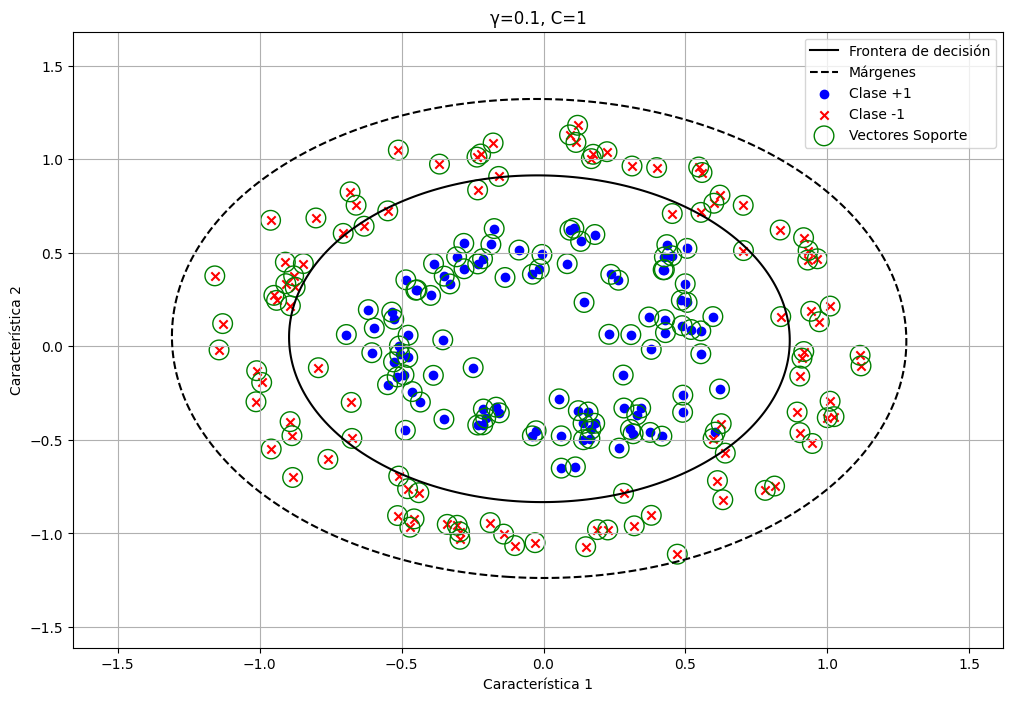

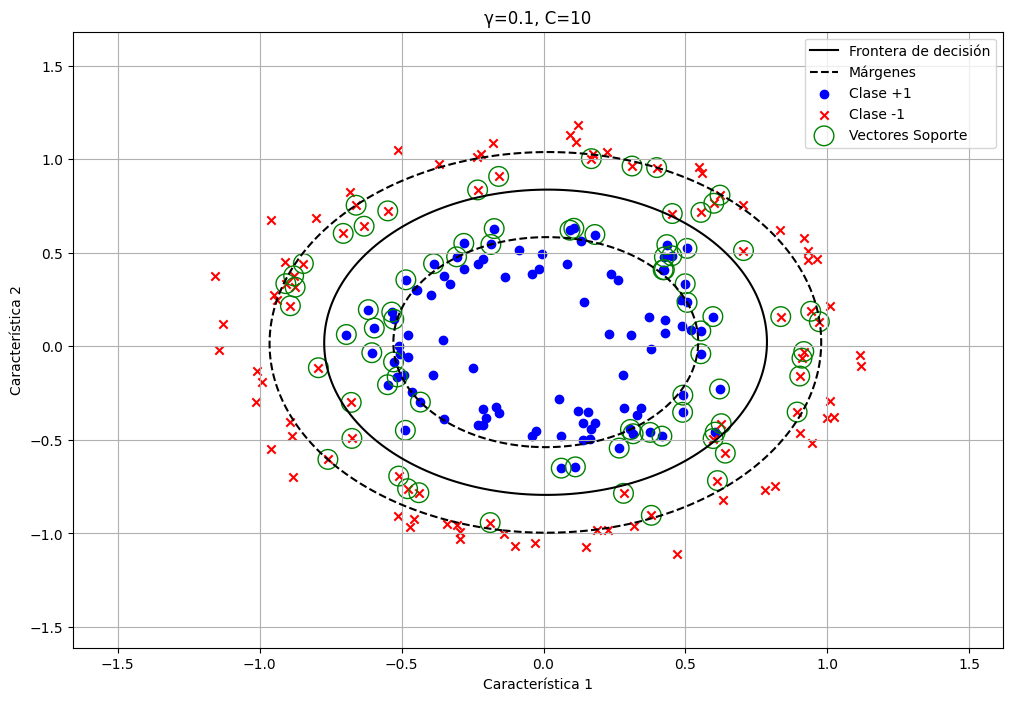

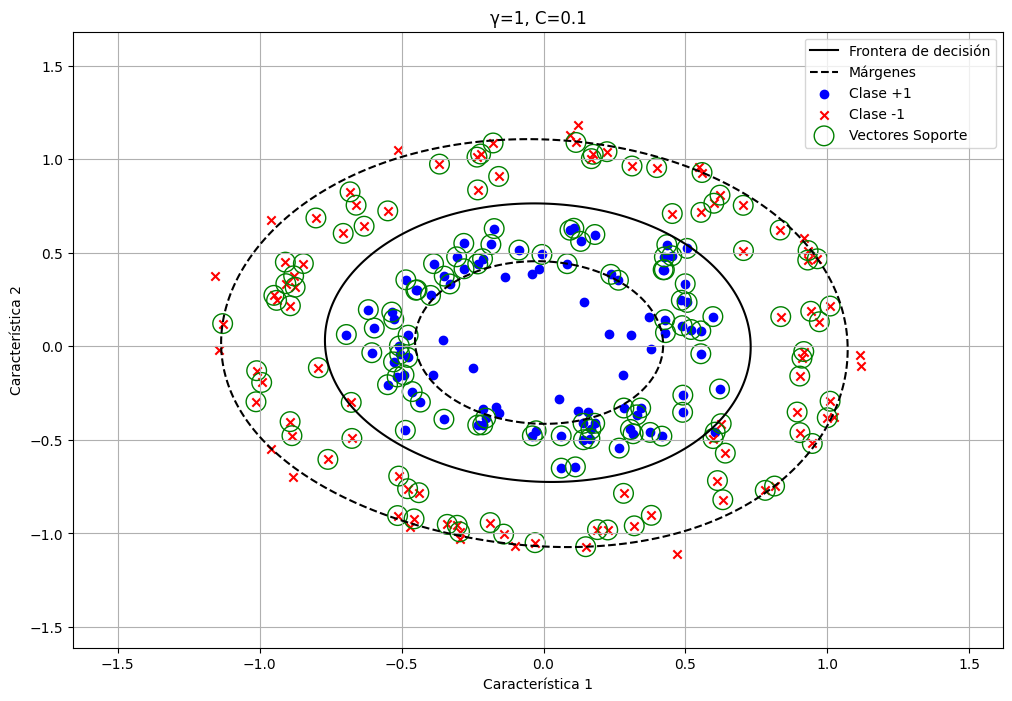

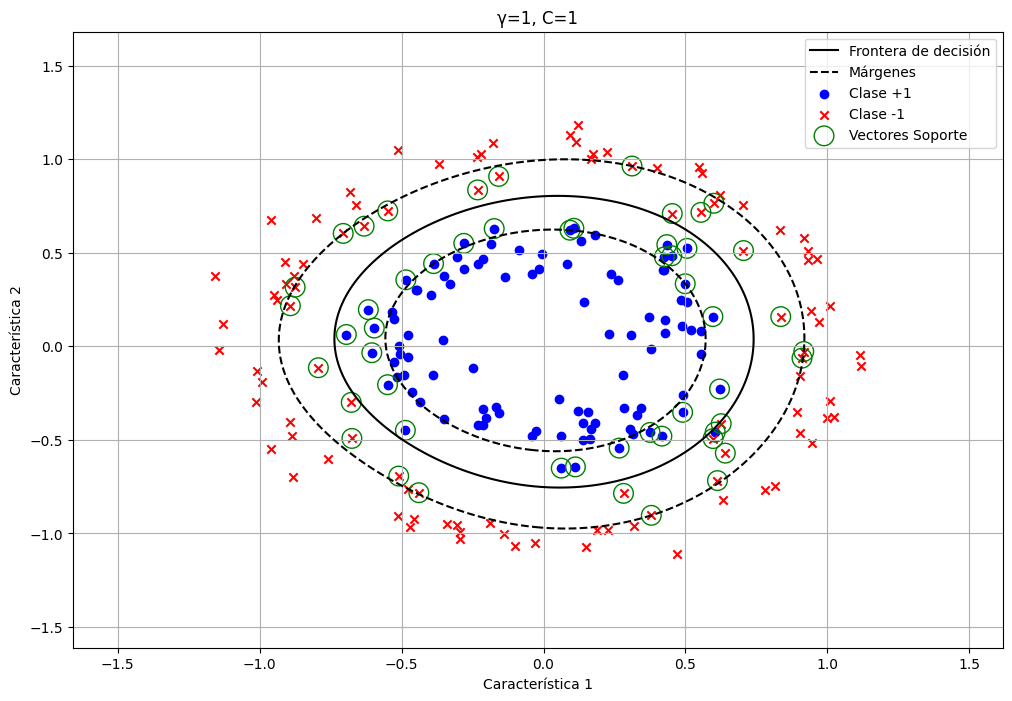

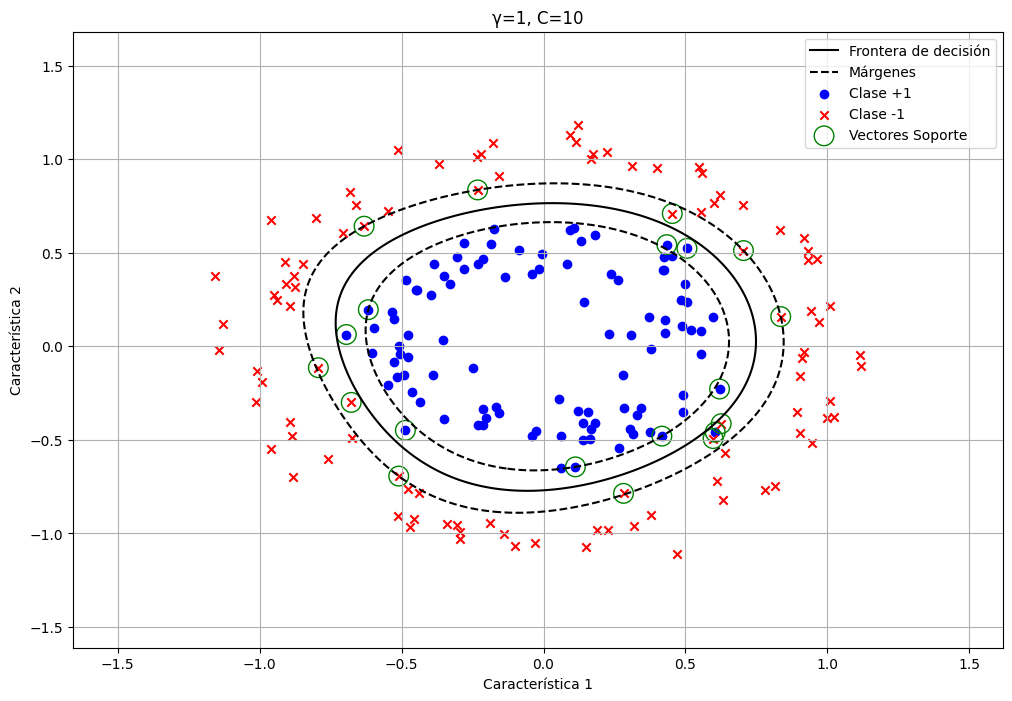

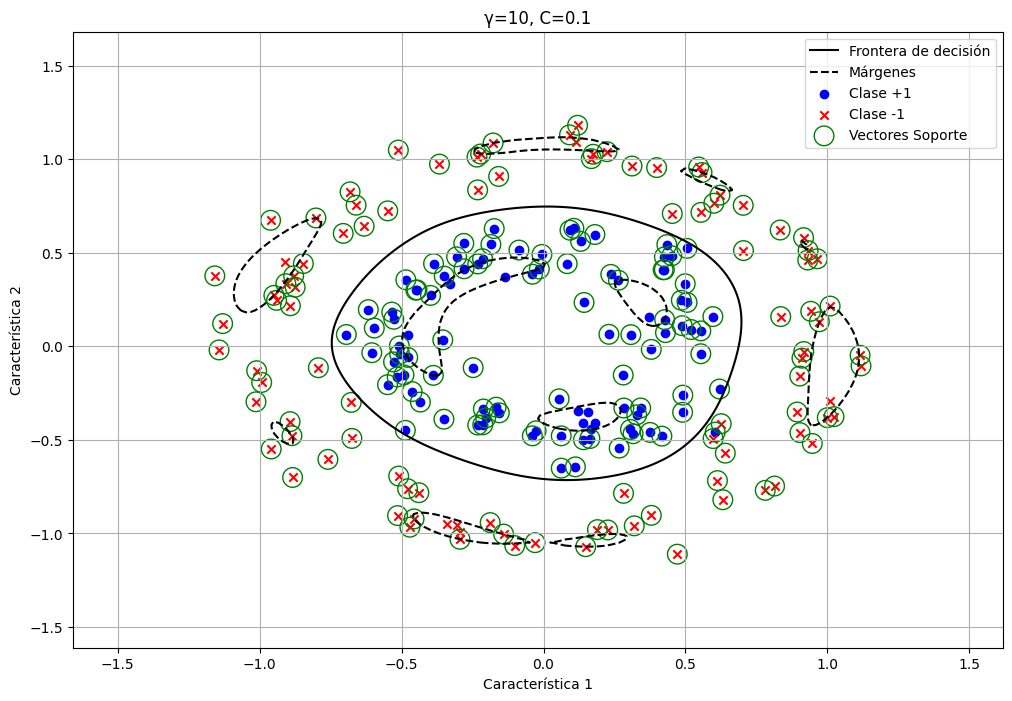

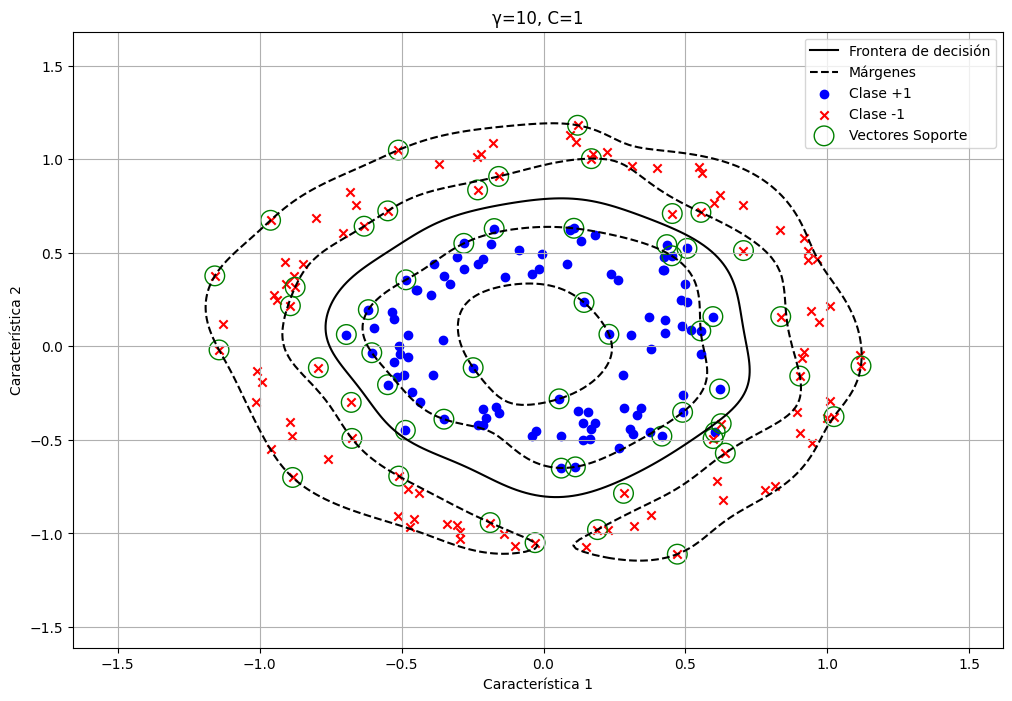

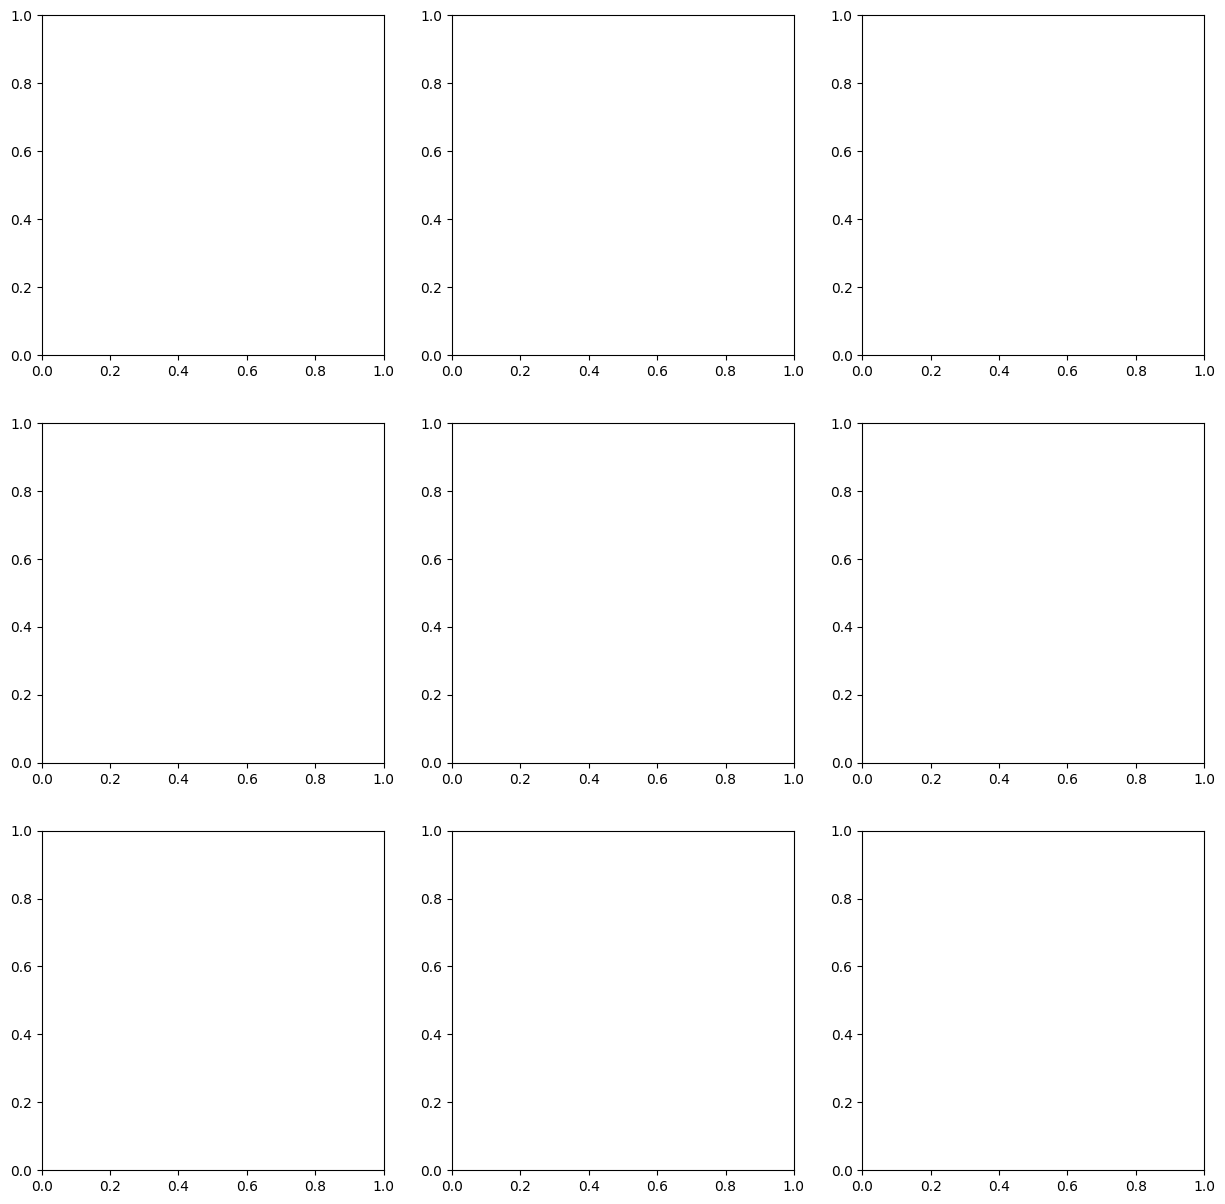

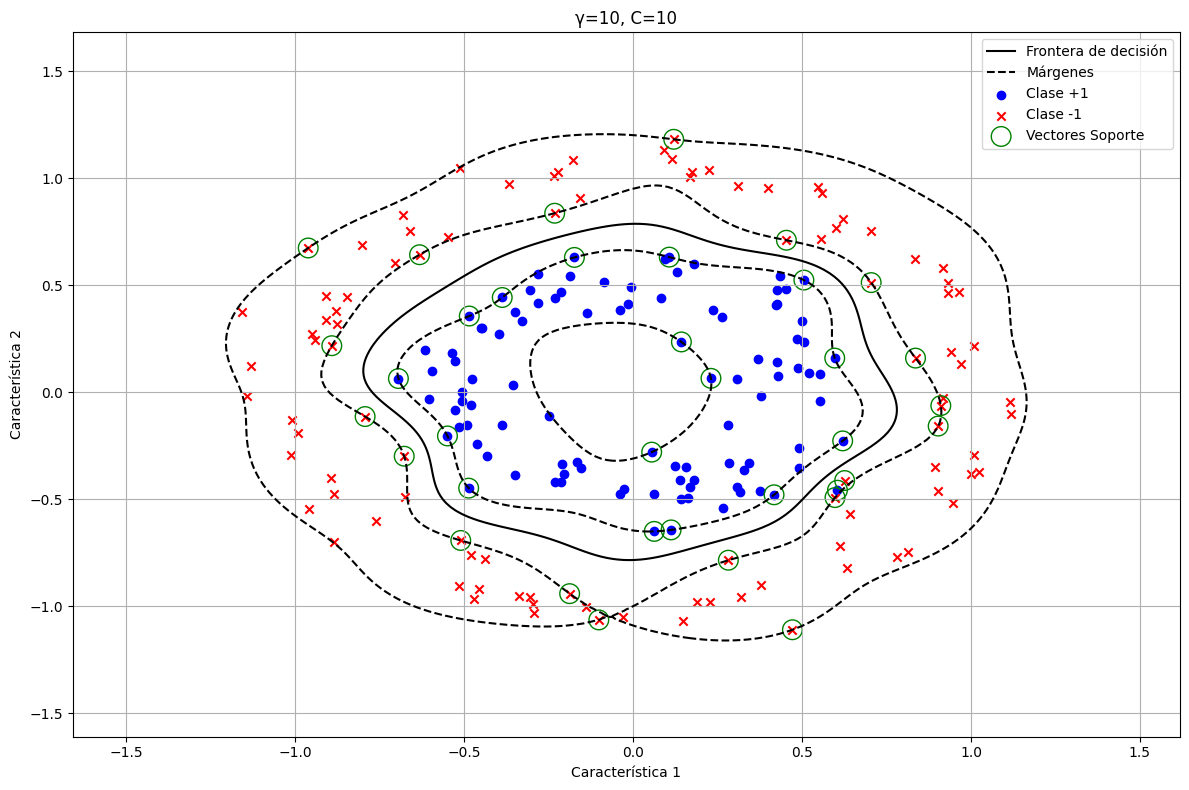

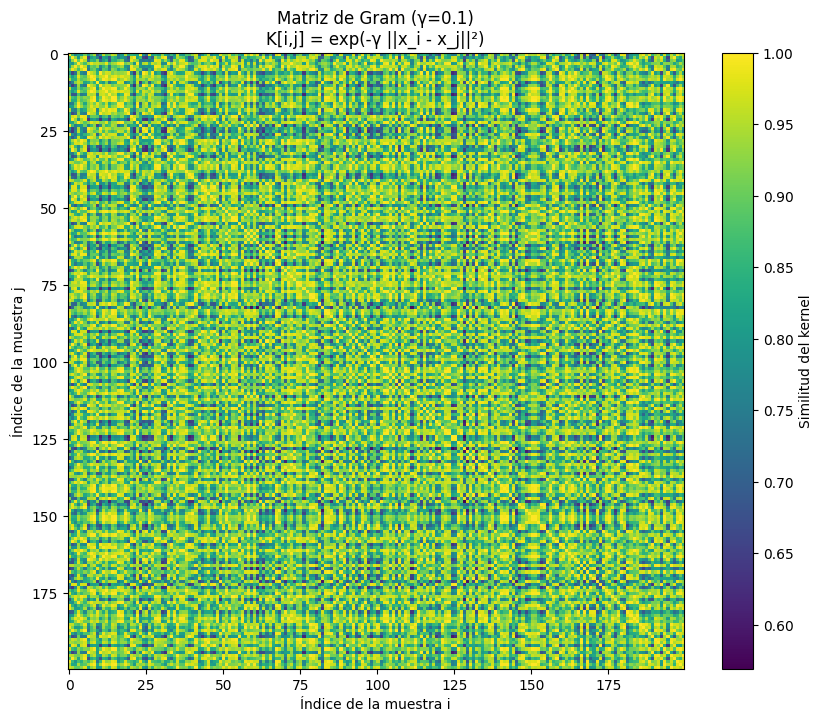


Análisis de matriz de Gram para γ=0.1:
- Dimensiones: (200, 200)
- Rango de similitudes: [0.5694, 1.0000]


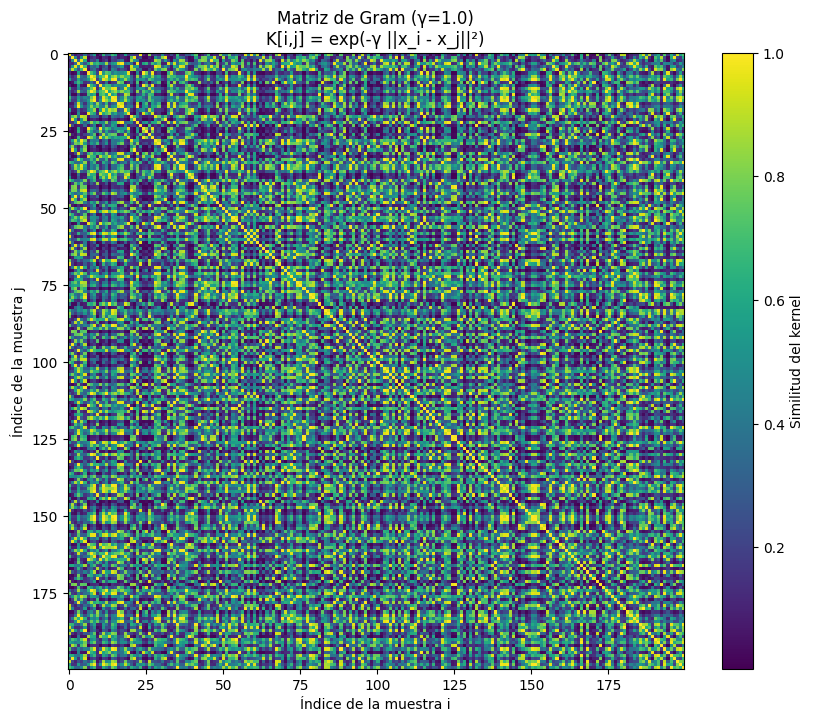


Análisis de matriz de Gram para γ=1.0:
- Dimensiones: (200, 200)
- Rango de similitudes: [0.0036, 1.0000]


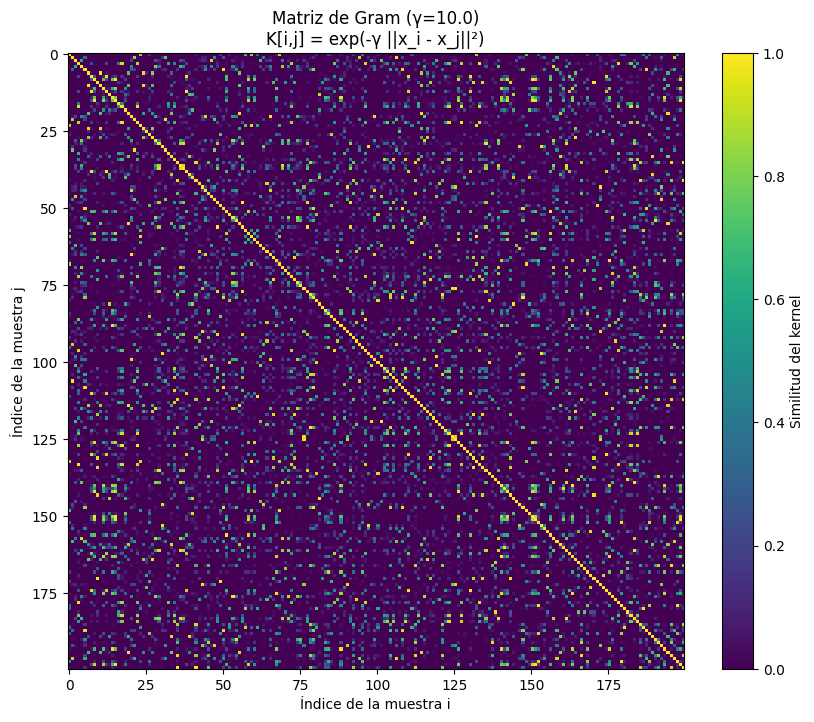


Análisis de matriz de Gram para γ=10.0:
- Dimensiones: (200, 200)
- Rango de similitudes: [0.0000, 1.0000]


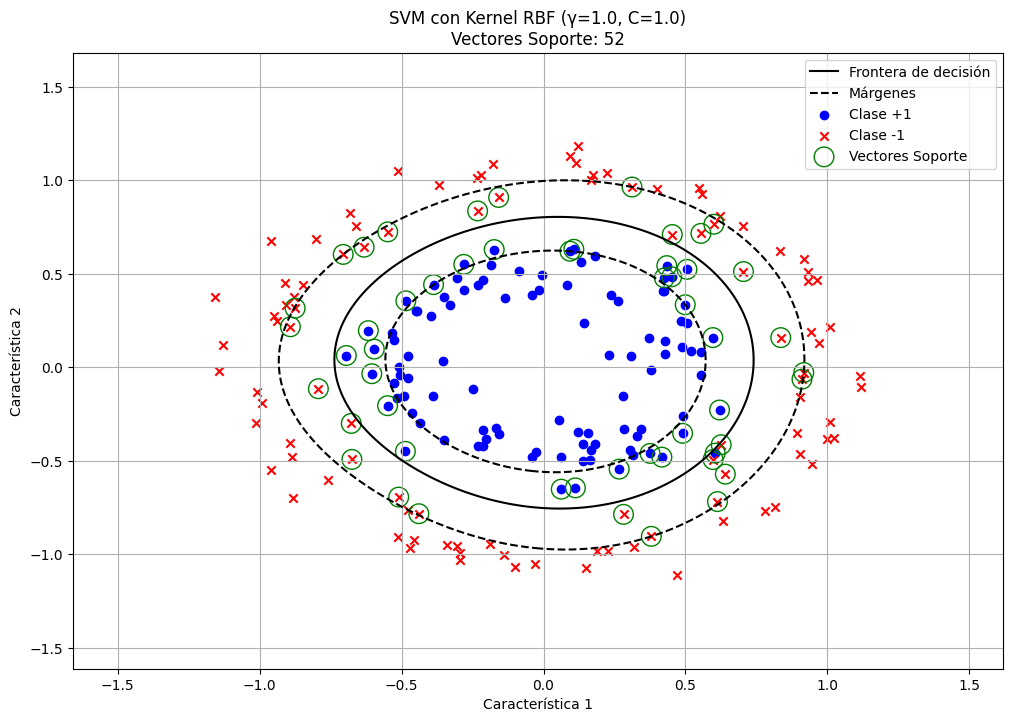

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd

def rbf_kernel(X1, X2, gamma):
    """
    Implementa el kernel RBF: K(x,z) = exp(-gamma ||x-z||^2)
    """
    dist_matrix = np.sum(X1**2, axis=1).reshape(-1, 1) + np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
    return np.exp(-gamma * dist_matrix)

def compute_gram_matrix(X, gamma):
    """
    Calcula la matriz de Gram usando el kernel RBF
    K[i,j] = K(x_i, x_j) = exp(-gamma ||x_i - x_j||^2)
    
    La matriz de Gram es simétrica y contiene la similitud
    entre cada par de puntos del conjunto de datos.
    """
    return rbf_kernel(X, X, gamma)

def analyze_gram_matrix(X, gamma):
    """
    Analiza la matriz de Gram y visualiza sus propiedades
    """
    K = compute_gram_matrix(X, gamma)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(K, cmap='viridis')
    plt.colorbar(label='Similitud del kernel')
    plt.title(f'Matriz de Gram (γ={gamma})\nK[i,j] = exp(-γ ||x_i - x_j||²)')
    plt.xlabel('Índice de la muestra i')
    plt.ylabel('Índice de la muestra j')
    plt.savefig(f'gram_matrix_gamma_{gamma}.png')
    plt.show()
    
    # Análisis de la matriz
    with open(f'gram_matrix_analysis_gamma_{gamma}.txt', 'w', encoding='utf-8') as f:
        f.write("Análisis de la Matriz de Gram\n")
        f.write("==========================\n\n")
        f.write(f"Dimensiones: {K.shape}\n")
        f.write(f"Valor máximo: {K.max():.4f}\n")
        f.write(f"Valor mínimo: {K.min():.4f}\n")
        f.write(f"Media: {K.mean():.4f}\n")
        f.write(f"Desviación estándar: {K.std():.4f}\n")
        f.write("\nInterpretación:\n")
        f.write("- K[i,j] = 1 significa que x_i y x_j son idénticos\n")
        f.write("- K[i,j] ~= 0 significa que x_i y x_j son muy diferentes\n")
        f.write("- La diagonal K[i,i] siempre es 1 (similitud de un punto consigo mismo)\n")
        
    return K

def plot_svm_rbf_decision_boundary(X, y, svm_model, gamma, C, title=None):
    """
    Visualiza la frontera de decisión del SVM con kernel RBF
    """
    plt.figure(figsize=(12, 8))
    
    # Crear malla para visualización
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                        np.linspace(y_min, y_max, 200))
    
    # Evaluar el modelo en la malla
    Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Graficar contornos de decisión
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1],
                linestyles=['--', '-', '--'])
    plt.plot([], [], 'k-', label='Frontera de decisión')
    plt.plot([], [], 'k--', label='Márgenes')
    
    # Graficar puntos de datos
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='b', marker='o',
               label='Clase +1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], c='r', marker='x',
               label='Clase -1')
    
    # Resaltar vectores soporte
    support_vectors = svm_model.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
               s=200, facecolors='none', edgecolors='g',
               label='Vectores Soporte')
    
    # Configuración del gráfico
    if title is None:
        title = f'SVM con Kernel RBF (γ={gamma}, C={C})\n'
        title += f'Vectores Soporte: {len(support_vectors)}'
    plt.title(title)
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.legend()
    plt.grid(True)
    
    return plt


if __name__ == "__main__":
    # Cargar datos no lineales
    try:
        # Usar la ruta correcta al archivo
        df = pd.read_csv("data/train_nonlinear.csv")
        print("Archivo cargado exitosamente")
        print("Columnas disponibles:", df.columns.tolist())
        X = df[['x1','x2']].to_numpy()
        y = df['y'].to_numpy()
        
        # Diagnóstico detallado
        print("Valores únicos en y antes de conversión:", np.unique(y))
        print("Tipo de datos de y:", y.dtype)
        print("Distribución de clases:")
        unique, counts = np.unique(y, return_counts=True)
        for val, count in zip(unique, counts):
            print(f"Clase {val}: {count} muestras")
        
        # Asegurar que y sea de tipo int y tenga dos clases
        y = y.astype(int)
        if set(np.unique(y)) == {-1, 1}:
            print("Las etiquetas ya están en formato [-1, 1]")
        else:
            print("Convirtiendo etiquetas al formato [-1, 1]")
            y = np.where(y <= 0, -1, 1)
            
        # Verificar la conversión
        print("\nDespués de la conversión:")
        print("Valores únicos en y:", np.unique(y))
        print("Tipo de datos de y:", y.dtype)
        unique, counts = np.unique(y, return_counts=True)
        for val, count in zip(unique, counts):
            print(f"Clase {val}: {count} muestras")
    except FileNotFoundError:
        print("Generando datos sintéticos no lineales...")
        np.random.seed(42)
        n_samples = 100
        
        # Generar datos en forma de círculos concéntricos
        radius1, radius2 = 2, 4
        n_samples_per_class = n_samples // 2
        
        # Clase interior (-1)
        theta = np.random.uniform(0, 2*np.pi, n_samples_per_class)
        r = np.random.normal(radius1, 0.4, n_samples_per_class)
        X1 = np.column_stack([r*np.cos(theta), r*np.sin(theta)])
        y1 = np.ones(n_samples_per_class) * -1
        
        # Clase exterior (+1)
        theta = np.random.uniform(0, 2*np.pi, n_samples_per_class)
        r = np.random.normal(radius2, 0.4, n_samples_per_class)
        X2 = np.column_stack([r*np.cos(theta), r*np.sin(theta)])
        y2 = np.ones(n_samples_per_class)
        
        X = np.vstack([X1, X2])
        y = np.hstack([y1, y2])
    
    # Analizar diferentes combinaciones de hiperparámetros
    gammas = [0.1, 1, 10]
    Cs = [0.1, 1, 10]
    analyze_hyperparameters(X, y, gammas, Cs)
    
    # Análisis de la matriz de Gram para diferentes valores de gamma
    for gamma in [0.1, 1.0, 10.0]:
        K = analyze_gram_matrix(X, gamma)
        print(f"\nAnálisis de matriz de Gram para γ={gamma}:")
        print(f"- Dimensiones: {K.shape}")
        print(f"- Rango de similitudes: [{K.min():.4f}, {K.max():.4f}]")
    
    # Entrenar y visualizar un modelo específico
    best_gamma, best_C = 1.0, 1.0
    svm = SVC(kernel='rbf', gamma=best_gamma, C=best_C)
    svm.fit(X, y)
    
    # Visualizar el mejor modelo
    plt = plot_svm_rbf_decision_boundary(X, y, svm, best_gamma, best_C)
    plt.savefig('svm_rbf_best_2.png')
    plt.show()
    
    # Guardar análisis
    with open('svm_rbf_analysis.txt', 'w') as f:
        f.write("Análisis del SVM con Kernel RBF\n")
        f.write("============================\n\n")
        f.write(f"Mejores hiperparámetros:\n")
        f.write(f"- gamma: {best_gamma}\n")
        f.write(f"- C: {best_C}\n\n")
        f.write(f"Número de vectores soporte: {len(svm.support_vectors_)}\n")
        f.write(f"Accuracy: {svm.score(X, y):.4f}\n\n")
        f.write("Observaciones:\n")
        f.write("- Un gamma mayor produce fronteras más flexibles\n")
        f.write("- Un C mayor permite menos errores de clasificación\n")
        f.write("- La interacción entre gamma y C afecta el equilibrio\n")
        f.write("  entre bias y varianza del modelo")

# Análisis del efecto de γ y C

### Análisis - Fase 4

El dataset está balanceado (100 y 100) y tiene forma de anillo: azules al centro y rojos alrededor.

**Efecto de γ**
  - γ controla la curvatura/localidad del kernel RBF y C la tolerancia a errores (regularización).
  - γ=0.1 (y C bajo): la Gram es muy clara en casi todo entonces casi todos se parecen; la frontera sale elíptica y suave lo que implica un subajuste.
  - γ=10: la Gram es casi diagonal (cada punto solo se parece a sí mismo) lo que implica que las fronteras son muy locales y hay riesgo de sobreajuste, sobre todo con C alto (márgenes irregulares/pegados al ruido).
  - γ=1: la Gram muestra similitudes variadas (ni todo igual ni todo aislado) entonces la frontera capta bien el anillo con márgenes razonables.

**Efecto de C**

  - C pequeño (0.1): márgenes anchos, más errores permitidos.
  - C grande (10): márgenes estrechos, sigue más el dato aunque puede memorizar outliers.
  - Los vectores soporte se colocan en los bordes interno/externo del anillo; al subir C suelen disminuir y el margen se cierra.

Con γ=1, C=1 se obtuvo ~52 de vectores de soporte (~26%)
En conjunto, las figuras dicen que el punto ideal está en γ aprox. 1 con C entre 1 y 10

#### **Análisis Teórico - Fase 4**

**1. ¿Qué sucede al aumentar γ (gamma) en la suavidad de la frontera?**

El parámetro **γ (gamma)** controla la **flexibilidad/complejidad** de la frontera de decisión en el kernel RBF:

$$K(x, z) = \exp(-\gamma \|x - z\|^2)$$

**Efecto de γ en el kernel:**

- **γ pequeño (ej: γ = 0.1):**
  - K(x, z) disminuye lentamente con la distancia entonces puntos lejanos aún tienen similitud significativa y el kernel es "suave" o "amplio"
  
  Esto genera una frontera suave y simple, es decir, 
  - Mejor generalización
  - Menos sensible a ruido
  - Puede subajustar (underfitting) si γ es muy pequeño

- **γ grande (ej: γ = 10):**
  - K(x, z) disminuye rápidamente con la distancia entonces solo puntos muy cercanos tienen similitud y el kernel es "estrecho" o "puntiagudo"

  Esto genera una frontera muy compleja y sinuosa, es decir,
  - Riesgo de sobreajuste (overfitting)
  - Muy sensible a ruido y outliers
  - Aunque puede capturar patrones complejos

**Matemáticamente...**

$$\text{Si } \gamma \to 0: \quad K(x, z) \to 1 \text{ para todo } x, z \text{ (modelo lineal)}$$

$$\text{Si } \gamma \to \infty: \quad K(x, z) \to \begin{cases} 1 & \text{si } x = z \\ 0 & \text{si } x \neq z \end{cases} \text{ (memorización)}$$

---

**2. ¿Cómo interactúan C y γ en sobreajuste/subajuste?**

Los parámetros **C** y **γ** tienen un **efecto combinado** en el trade-off bias-variance:

**Matriz de Interacción:**

| | **C pequeño** (0.1) | **C medio** (1.0) | **C grande** (10) |
|---|---|---|---|
| **γ pequeño** (0.1) |  **SUBAJUSTE** | Generaliza bien | Balance |
| | Frontera muy simple | Frontera suave | Frontera suave pero precisa |
| | Muchas violaciones | Algunas violaciones | Pocas violaciones |
| **γ medio** (1.0) | Subajuste leve | **ÓPTIMO** | Sobreajuste leve |
| | Frontera simple | Balance ideal | Frontera compleja |
| | Tolerante a errores | Buena generalización | Poco tolerante |
| **γ grande** (10) | Balance | Sobreajuste leve | **SOBREAJUSTE** |
| | Frontera compleja | Frontera muy compleja | Frontera extremadamente compleja |
| | Permite violaciones | Pocas violaciones | Sin violaciones (memoriza) |



**Relación con el error:**

$$\text{Error Total} = \underbrace{\text{Bias}^2}_{\text{Subajuste}} + \underbrace{\text{Variance}}_{\text{Sobreajuste}} + \text{Ruido}$$

- **Aumentar γ:** ↓ Bias, ↑ Variance
- **Aumentar C:** ↓ Bias, ↑ Variance
- **Disminuir γ:** ↑ Bias, ↓ Variance
- **Disminuir C:** ↑ Bias, ↓ Variance

# Conclusiones

## Dificultades con Git
El uso de Git presentó desafíos significativos, ya que la mayor parte del equipo no tenía experiencia, especialmente en la gestión de versiones. Cuando otro equipo subió material, resultó confuso volver a descargar los datos actualizados. La curva de aprendizaje de los comandos es alta, pero aprender Git es esencial para un trabajo colaborativo eficiente y organizado. También comprendimos la importancia de mantener ramas bien documentadas y de realizar *commits* claros para evitar conflictos.

## Hallazgos sobre SVM

### Efecto del Parámetro C en Clasificación Lineal
Las gráficas de la práctica nos ayudaron mucho a identificar los siguientes puntos:
- **C pequeño**: Mayor tolerancia a errores → margen más ancho, pero posible *underfitting*.
- **C grande**: Clasificador más estricto → margen más estrecho, riesgo de *overfitting*.

Además, aprendimos que el parámetro **C** actúa como un regulador del equilibrio entre complejidad y generalización del modelo.

### Efecto del Parámetro γ en Kernel RBF
Una ronda no la ganamos debido a una mala elección de **γ**, ya que generamos una frontera compleja que no sabíamos cómo explicar. Esto retrasó la entrega de resultados, pero nos permitió observar que:
- **γ pequeño**: Curva de decisión suave → comportamiento similar al modelo lineal.
- **γ grande**: Frontera compleja y muy ajustada → alto riesgo de *overfitting*.

También aprendimos que es importante explorar una gama de valores de **γ** mediante validación cruzada, para encontrar el punto óptimo entre precisión y generalización.

### Comparación Lineal vs No Lineal
Probamos que, si no se usa el kernel RBF, hay datos que no podríamos separar adecuadamente. Notamos que existen dos enfoques principales que dependen totalmente de la distribución de los datos:
- **Enfoque lineal**: Adecuado para datos separables linealmente; más rápido computacionalmente.
- **Kernel RBF**: Superior para patrones complejos, pero requiere un ajuste cuidadoso de parámetros.

Esta comparación reforzó nuestra comprensión sobre la importancia de analizar primero la naturaleza de los datos antes de elegir un modelo.

## Lecciones Aprendidas sobre Vectores de Soporte
Ninguno del equipo tenía claro inicialmente la interpretación de estos vectores, pero después de graficarlos comprendimos cómo son seleccionados. Al visualizar el margen, pudimos identificar claramente los criterios que los definen. Además, notamos cómo cambian los vectores de soporte al modificar el kernel y sus parámetros, lo cual nos ayudó a entender su papel como los puntos más críticos para definir la frontera de decisión.

También aprendimos que no todos los puntos de entrenamiento influyen en el modelo, sino solo aquellos vectores de soporte que delimitan el margen óptimo.

## Conclusión General
La práctica nos permitió comprobar la afirmación de que **“no existe una configuración universal para SVM”**, ya que la elección del kernel y sus parámetros depende directamente de la distribución de los datos y del problema específico. Además, comprendimos la importancia de aplicar un proceso de **validación cruzada** para ajustar los hiperparámetros y prevenir el sobreajuste.  
Finalmente, reforzamos la idea de que la interpretación visual y experimental es clave para desarrollar una intuición sólida sobre el comportamiento de los clasificadores SVM.
